In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet

## Load Original Dataset

In [2]:
origin = pd.read_csv("C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_dataset.csv", encoding='MacRoman'
                   ,on_bad_lines='skip', index_col=None
                  # names=["time", "source_ip", "protocols", "info_message"]
                  )
origin.rename(columns = {'_ws.col.Index':'index_ws',
                       '_ws.col.Info':'info_message',
                       '_ws.col.start_time':'start_time',
                       '_ws.col.Source':'source_ip',
                       '_ws.col.Destination':'destination_ip',
                       '_ws.col.Protocol':'protocol',
                       '_ws.col.sport':'source_port',
                       '_ws.col.dport':'destination_port'}, inplace = True)

In [3]:
origin.head()

,source_ip,destination_ip,source_port,destination_port,protocol,start_time,info_message
0,149.171.126.18,175.45.176.1,80,4657,HTTP,1.424219e+09,HTTP/1.1 200 OK [Malformed Packet]
1,175.45.176.1,149.171.126.18,4657,80,HTTP,1.424219e+09,GET /oKmwKoVbq HTTP/1.1
2,175.45.176.3,149.171.126.18,32473,80,HTTP,1.424219e+09,GET /level/15/exec/-/buffers/assigned/dump HTT...
3,175.45.176.2,149.171.126.19,59386,8020,HTTP,1.424219e+09,POST /HttpFileUpload/FileUploadController.do H...
4,149.171.126.14,175.45.176.0,80,21873,HTTP,1.424219e+09,[TCP ACKed unseen segment] HTTP/1.1 200 OK (t...


In [4]:
origin.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489203 entries, 0 to 489202
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source_ip         489203 non-null  object 
 1   destination_ip    489203 non-null  object 
 2   source_port       489203 non-null  int64  
 3   destination_port  489203 non-null  int64  
 4   protocol          489203 non-null  object 
 5   start_time        489203 non-null  float64
 6   info_message      489203 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 145.8 MB


In [5]:
# memory optimization with fast.ai
from fastai.tabular.core import df_shrink
origin = df_shrink(origin)
origin.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489203 entries, 0 to 489202
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   source_ip         489203 non-null  category
 1   destination_ip    489203 non-null  category
 2   source_port       489203 non-null  int32   
 3   destination_port  489203 non-null  int32   
 4   protocol          489203 non-null  category
 5   start_time        489203 non-null  float32 
 6   info_message      489203 non-null  category
dtypes: category(4), float32(1), int32(2)
memory usage: 10.9 MB


In [6]:
origin['start_time'] = origin['start_time'].astype('int32')

## Load GT Dataset

In [7]:
gt = pd.read_csv("C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_ground_truth\\NUSW-NB15_GT.csv"
                   ,on_bad_lines='skip')

In [8]:
import re
def clean_colname(colname):
    return re.sub(r'\s+', '_', colname.lower())

In [9]:
gt = gt.rename(columns={colname: clean_colname(colname) for colname in gt.columns})

In [10]:
gt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          174347 non-null  int64 
 1   last_time           174347 non-null  int64 
 2   attack_category     174347 non-null  object
 3   attack_subcategory  170250 non-null  object
 4   protocol            174347 non-null  object
 5   source_ip           174347 non-null  object
 6   source_port         174347 non-null  int64 
 7   destination_ip      174347 non-null  object
 8   destination_port    174347 non-null  int64 
 9   attack_name         174346 non-null  object
 10  attack_reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 156.5 MB


In [11]:
gt.head()

,start_time,last_time,attack_category,attack_subcategory,protocol,source_ip,source_port,destination_ip,destination_port,attack_name,attack_reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf (https://strikecenter.bpointsys.com/bps/strikes/recon/http/domino/access_domino_doladmin_nsf.xml),-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (https://strikecenter.bpointsys.com/bps/strikes/exploits/rservices/solaris_rwall_format_string.xml),CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2002%2d0573)BID 4639 (http://www.securityfocus.com/bid/4639)CVSS-High (https://strikecenter.bpointsys.com/bps/reference/CVSS/7.5%20%28AV%3aN%2fAC%3aL%2fAu%3aN%2fC%3aP%2fI%3aP%2fA%3aP%29),.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Execution [009] (https://strikecenter.bpointsys.com/bps/strikes/exploits/browser/wmf_009.xml),CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2005%2d4560)BID 16074 (http://www.securityfocus.com/bid/16074)OSVDB 21987 (http://www.osvdb.org/21987)CVSS-High (https://strikecenter.bpointsys.com/bps/reference/CVSS/7.5%20%28AV%3aN%2fAC%3aL%2fAu%3aN%2fC%3aP%2fI%3aP%2fA%3aP%29),.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter.bpointsys.com/bps/strikes/exploits/misc/cve_2011_1729.xml),CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2011%2d1729)BID 47638 (http://www.securityfocus.com/bid/47638)OSVDB 72188 (http://www.osvdb.org/72188)CVSS-Critical (https://strikecenter.bpointsys.com/bps/reference/CVSS/10.0%20%28AV%3aN%2fAC%3aL%2fAu%3aN%2fC%3aC%2fI%3aC%2fA%3aC%29),.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 (https://strikecenter.bpointsys.com/bps/strikes/exploits/ios/cisco_auth_bypass_level_64.xml),CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2001%2d0537)BID 2936 (http://www.securityfocus.com/bid/2936)OSVDB 578 (http://www.osvdb.org/578)CVSS-High (https://strikecenter.bpointsys.com/bps/reference/CVSS/9.3%20%28AV%3aN%2fAC%3aM%2fAu%3aN%2fC%3aC%2fI%3aC%2fA%3aC%29),.


In [12]:
## memory optimization with fast.ai
gt = df_shrink(gt)
gt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   start_time          174347 non-null  int32   
 1   last_time           174347 non-null  int32   
 2   attack_category     174347 non-null  category
 3   attack_subcategory  170250 non-null  category
 4   protocol            174347 non-null  category
 5   source_ip           174347 non-null  category
 6   source_port         174347 non-null  int32   
 7   destination_ip      174347 non-null  category
 8   destination_port    174347 non-null  int32   
 9   attack_name         174346 non-null  category
 10  attack_reference    123709 non-null  category
 11  .                   174347 non-null  category
dtypes: category(8), int32(4)
memory usage: 11.8 MB


## Joining origin with gt dataframe

### Labeled W start_time

In [13]:
labeled = pd.merge(origin, gt, how='left', on=['source_ip', 'destination_ip', 'source_port', 'destination_port'])[
                ['source_ip', 'destination_ip', 'source_port', 'destination_port', 'protocol_x', 'info_message', 'attack_category', 'start_time_x', 'start_time_y', 'last_time']
                ]

In [15]:
labeled = labeled[labeled['start_time_x'].between(labeled['start_time_y'], labeled['last_time'])]

In [17]:
labeled.head()

,source_ip,destination_ip,source_port,destination_port,protocol_x,info_message,attack_category,start_time_x,start_time_y,last_time,is_malware
1254,175.45.176.1,149.171.126.16,1943,80,HTTP,PROPFIND /yywTQjhxDFCSMtzUrCx.HtML HTTP/1.1,Exploits,1424220032,1.424220e+09,1.424220e+09,1
1255,175.45.176.1,149.171.126.16,1943,80,HTTP,GET /yywTQjhxDFCSMtzUrCx.HtML HTTP/1.1,Exploits,1424220032,1.424220e+09,1.424220e+09,1
2607,175.45.176.2,149.171.126.10,46354,80,HTTP,GET /cgi-bin/zsh HTTP/1.1,Reconnaissance,1424220288,1.424220e+09,1.424220e+09,1
2621,175.45.176.1,149.171.126.16,3773,80,HTTP,GET / HTTP/1.1,Exploits,1424220288,1.424220e+09,1.424220e+09,1
10542,175.45.176.2,149.171.126.14,59415,80,HTTP,GET 7cT3vI6X0X3 HTTP/1.1,Exploits,1424234880,1.424235e+09,1.424235e+09,1


In [16]:
labeled['is_malware'] = np.where(labeled['attack_category'].isnull(), 0, 1)

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [18]:
labeled.is_malware.value_counts()

is_malware
1    304
Name: count, dtype: int64

In [17]:
labeled.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489203 entries, 0 to 489202
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   source_ip         489203 non-null  object  
 1   destination_ip    489203 non-null  object  
 2   source_port       489203 non-null  int32   
 3   destination_port  489203 non-null  int32   
 4   protocol_x        489203 non-null  category
 5   info_message      489203 non-null  category
 6   attack_category   134 non-null     category
 7   is_malware        489203 non-null  int32   
dtypes: category(3), int32(3), object(2)
memory usage: 74.5 MB


In [27]:
# Convert the categorical columns to strings
labeled['source_ip'] = labeled['source_ip'].astype(str)
labeled['source_port'] = labeled['source_port'].astype(str)
labeled['info_message'] = labeled['info_message'].astype(str)

# create new columns for graph modeling
labeled['source_ip_info'] = labeled['source_ip'] + ' ' + labeled['info_message']
labeled['source_ip_info'] = labeled['source_ip_info'].astype(str)
labeled['source_port_info'] = labeled['source_port'] + ' ' + labeled['info_message']
labeled['source_port_info'] = labeled['source_port_info'].astype(str)


In [28]:
### Export to parquet
labeled.to_parquet('C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_parquet_used_dataset\\labeled_w_start_time.parquet')

### Labeled WO start_time

In [ ]:
origin = pd.read_csv("C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_dataset.csv", encoding='MacRoman'
                   ,on_bad_lines='skip', index_col=None
                  # names=["time", "source_ip", "protocols", "info_message"]
                  )
origin.rename(columns = {'_ws.col.Index':'index_ws',
                       '_ws.col.Info':'info_message',
                       '_ws.col.start_time':'start_time',
                       '_ws.col.Source':'source_ip',
                       '_ws.col.Destination':'destination_ip',
                       '_ws.col.Protocol':'protocol',
                       '_ws.col.sport':'source_port',
                       '_ws.col.dport':'destination_port'}, inplace = True)
gt = pd.read_csv("C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_ground_truth\\NUSW-NB15_GT.csv"
                   ,on_bad_lines='skip')
labeled_wo_start_time = pd.merge(origin, gt, how='left', on=['source_ip', 'destination_ip', 'source_port', 'destination_port'])[
                ['source_ip', 'destination_ip', 'source_port', 'destination_port', 'info_message', 'attack_category']
                ]

In [13]:
labeled_wo_start_time = pd.merge(origin, gt, how='left', on=['source_ip', 'destination_ip', 'source_port', 'destination_port'])[
                ['source_ip', 'destination_ip', 'source_port', 'destination_port', 'info_message', 'attack_category']
                ]

In [14]:
labeled_wo_start_time['is_malware'] = np.where(labeled_wo_start_time['attack_category'].isnull(), 0, 1)

In [15]:
labeled_wo_start_time.head()

,source_ip,destination_ip,source_port,destination_port,info_message,attack_category,is_malware
0,149.171.126.18,175.45.176.1,80,4657,HTTP/1.1 200 OK [Malformed Packet],NaN,0
1,175.45.176.1,149.171.126.18,4657,80,GET /oKmwKoVbq HTTP/1.1,NaN,0
2,175.45.176.3,149.171.126.18,32473,80,GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,NaN,0
3,175.45.176.2,149.171.126.19,59386,8020,POST /HttpFileUpload/FileUploadController.do HTTP/1.1,NaN,0
4,149.171.126.14,175.45.176.0,80,21873,[TCP ACKed unseen segment] HTTP/1.1 200 OK (text/html),NaN,0


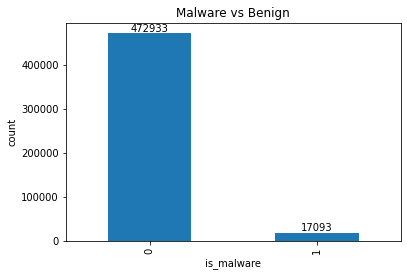

In [20]:
labeled_wo_start_time.is_malware.value_counts().plot(kind='bar', title='Malware vs Benign')
plt.xlabel('is_malware')
plt.ylabel('count')
value_counts = labeled_wo_start_time.is_malware.value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [16]:
labeled_wo_start_time.is_malware.value_counts()

is_malware
0    472933
1     17093
Name: count, dtype: int64

In [18]:
labeled_wo_start_time.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490026 entries, 0 to 490025
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   source_ip         490026 non-null  object  
 1   destination_ip    490026 non-null  object  
 2   source_port       490026 non-null  int32   
 3   destination_port  490026 non-null  int32   
 4   info_message      490026 non-null  category
 5   attack_category   17093 non-null   category
 6   is_malware        490026 non-null  int32   
dtypes: category(2), int32(3), object(2)
memory usage: 74.1 MB


In [19]:
# Convert the categorical columns to strings
labeled_wo_start_time['source_ip'] = labeled_wo_start_time['source_ip'].astype(str)
labeled_wo_start_time['source_port'] = labeled_wo_start_time['source_port'].astype(str)
labeled_wo_start_time['info_message'] = labeled_wo_start_time['info_message'].astype(str)

# create new columns for graph modeling
labeled_wo_start_time['source_ip_info'] = labeled_wo_start_time['source_ip'] + ' ' + labeled_wo_start_time['info_message']
labeled_wo_start_time['source_ip_info'] = labeled_wo_start_time['source_ip_info'].astype(str)
labeled_wo_start_time['source_port_info'] = labeled_wo_start_time['source_port'] + ' ' + labeled_wo_start_time['info_message']
labeled_wo_start_time['source_port_info'] = labeled_wo_start_time['source_port_info'].astype(str)


In [20]:
# Convert the categorical columns to strings
labeled_wo_start_time['destination_ip'] = labeled_wo_start_time['destination_ip'].astype(str)
labeled_wo_start_time['destination_port'] = labeled_wo_start_time['destination_port'].astype(str)

labeled_wo_start_time['dest_ip_info'] = labeled_wo_start_time['destination_ip'] + ' ' + labeled_wo_start_time['info_message']
labeled_wo_start_time['dest_ip_info'] = labeled_wo_start_time['dest_ip_info'].astype(str)
labeled_wo_start_time['dest_port_info'] = labeled_wo_start_time['destination_port'] + ' ' + labeled_wo_start_time['info_message']
labeled_wo_start_time['dest_port_info'] = labeled_wo_start_time['dest_port_info'].astype(str)

In [21]:
### Export to parquet
labeled_wo_start_time.to_parquet('C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_parquet_used_dataset\\labeled_wo_start_time.parquet')